In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

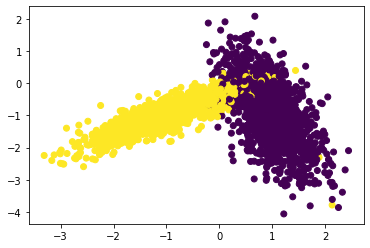

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
import random
#def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
def RandomSearchCV(param_range, folds):
    params = sorted(np.random.choice(range(1,param_range), 10, replace = False))
    #params = [3,5,7,9,11,13,15,17,19,21,23]
    train_acc_score = []
    test_acc_score = []
    
    
    for i in tqdm(params):

        trnscore_f = []
        tstscore_f = []
        
        for j in range(0,folds):
            train_indices = random.sample(range(0, len(X_train)),int(0.6*len(X_train)))
            test_indices = list(set(list(range(0, len(X_train)))) - set(train_indices))

            xtr = X_train[train_indices]
            ytr = y_train[train_indices]
            xts = X_train[test_indices]
            yts = y_train[test_indices]

            clf = KNeighborsClassifier(i)
            clf.fit(xtr, ytr)

            ypredtr = clf.predict(xtr)
            trnscore_f.append(accuracy_score(ytr, ypredtr)) #train

            ypredts = clf.predict(xts)
            tstscore_f.append(accuracy_score(yts, ypredts)) #CVtest

        train_acc_score.append(np.mean(np.array(trnscore_f)))
        test_acc_score.append(np.mean(np.array(tstscore_f)))

    return train_acc_score, test_acc_score, params

In [4]:
train_acc_score, test_acc_score, params = RandomSearchCV(50,3)


100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


In [5]:
k = params
print(max(test_acc_score))
print(k)


0.9580000000000001
[6, 13, 19, 21, 26, 31, 40, 44, 45, 47]


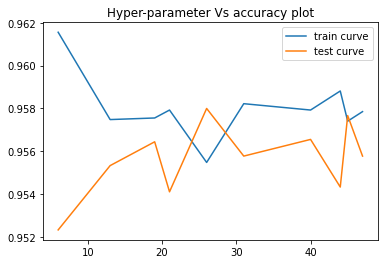

In [6]:
plt.plot(k, train_acc_score, label= 'train curve')
plt.plot(k, test_acc_score, label= 'test curve')
plt.title('Hyper-parameter Vs accuracy plot')
plt.legend()
plt.show()

In [7]:
import random
#def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
def RandomSearchCV(param_range, folds):
    #params = np.random.choice(range(1,param_range), 10, replace = False)
    params = [26]
    train_acc_score = []
    test_acc_score = []
    
    
    for i in tqdm(params):

        trnscore_f = []
        tstscore_f = []
        
        for j in range(0,folds):
            train_indices = random.sample(range(0, len(X_train)),int(0.6*len(X_train)))
            test_indices = list(set(list(range(0, len(X_train)))) - set(train_indices))

            xtr = X_train[train_indices]
            ytr = y_train[train_indices]
            xts = X_train[test_indices]
            yts = y_train[test_indices]

            clf = KNeighborsClassifier()
            clf.fit(xtr, ytr)

            ypredtr = clf.predict(xtr)
            trnscore_f.append(accuracy_score(ytr, ypredtr)) #train

            ypredts = clf.predict(xts)
            tstscore_f.append(accuracy_score(yts, ypredts)) #CVtest

        train_acc_score.append(np.mean(np.array(trnscore_f)))
        test_acc_score.append(np.mean(np.array(tstscore_f)))

    return train_acc_score, test_acc_score, params

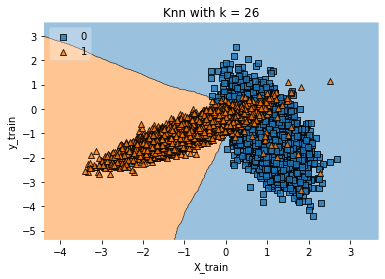

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf = KNeighborsClassifier(n_neighbors=26).fit(X_train, y_train), legend=2)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Knn with k = '+ str(26))
plt.show()